# Exploratory Data Analysis

In [57]:
import pickle as pkl
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 1. Read in Data

In [3]:
# Read in patient data
df = pd.read_excel(open('./data/KD-FC-Peter-alg-BLINDED-set1-20171229.xlsx', 'rb'), sheetname='Peter set 1- training set')
features = pd.read_excel(open('./data/KD-FC-Peter-alg-BLINDED-set1-20171229.xlsx', 'rb'), sheetname='Variables')

In [4]:
# Make sure we can display all features
pd.options.display.max_columns = 30

In [5]:
# Patient features
features

,Variable name,Description,Codes,Notes
0,peternum,random ID #,NaN,NaN
1,illday,Illness Day,NaN,all pts within first 10 days of illness
2,fever,presence of fever,"0, No | 1, Yes",NaN
3,rash,Rash,"0, No | 1, Yes",NaN
4,redeyes,Red Eyes,"0, No | 1, Yes",NaN
5,redplt,"Red pharynx, lips, strawberry tongue","0, No | 1, Yes",NaN
6,clnode,Cervical lymph node >1.5 cm,"0, No | 1, Yes",NaN
7,redhands,Red/ swollen hands/ feet,"0, No | 1, Yes",NaN
8,pwbc,WBC (10^3/uL),NaN,NaN
9,ppolys,Polymorphonuclears or Neutrophils (%),NaN,NaN


In [6]:
# Sample rows
df.head()

,peternum,illday,fever,rash,redeyes,redplt,clnode,redhands,pwbc,ppolys,pbands,plymphs,pmonos,peos,phgb,signESR,pesr,signCRP,pcrp,pplts,signALT,palt,signGGT,pggt,zhemo,label
0,10072,4,1,1,1,1,0,1,8.76,80.94,NaN,13.0,2.0,1.0,10.2,NaN,104.0,NaN,19.01,293.0,NaN,16.0,NaN,NaN,-2.63,1
1,10195,10,1,1,1,1,1,1,16.00,61.00,13.0,14.0,7.0,5.0,10.0,NaN,103.0,NaN,29.00,433.0,NaN,106.0,NaN,NaN,-3.17,1
2,10367,6,1,1,1,1,1,1,8.97,77.26,NaN,16.0,2.0,2.0,9.7,NaN,52.0,NaN,9.00,238.0,NaN,54.0,NaN,NaN,-3.25,1
3,10369,3,1,1,1,1,1,1,18.80,69.00,25.0,4.0,1.0,1.0,11.8,NaN,60.0,NaN,5.30,256.0,NaN,347.0,NaN,133.0,-0.63,1
4,10509,6,1,1,1,1,1,1,15.30,92.00,0.0,0.0,7.0,1.0,11.1,NaN,50.0,NaN,3.30,346.0,NaN,18.0,<,10.0,-1.33,1


## 2. Summary Statistics & Histograms

In [7]:
# Summary statistics
df.describe()

,peternum,illday,fever,rash,redeyes,redplt,clnode,redhands,pwbc,ppolys,pbands,plymphs,pmonos,peos,phgb,pesr,pcrp,pplts,palt,pggt,zhemo,label
count,1005.000000,1005.000000,1005.0,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,991.000000,619.000000,990.000000,986.000000,986.000000,1001.000000,969.000000,993.000000,994.000000,967.000000,625.000000,1001.000000,1005.000000
mean,55512.072637,5.992040,1.0,0.867662,0.865672,0.811940,0.307463,0.646766,13.337891,59.191847,9.603069,23.938586,6.203347,2.813387,11.316374,56.406801,9.819225,341.751509,77.661841,75.195200,-1.152747,0.790050
std,25738.100620,1.951079,0.0,0.339027,0.341175,0.390954,0.461672,0.478213,5.513841,18.803614,12.002465,15.888032,3.918230,3.540229,1.326948,29.849955,8.067779,135.187705,133.684389,90.195391,1.626357,0.407476
min,10072.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6.600000,1.000000,0.200000,9.000000,3.000000,5.000000,-9.220000,0.000000
25%,33643.000000,5.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,9.500000,47.000000,0.000000,12.000000,3.000000,0.000000,10.500000,36.000000,3.800000,252.000000,22.000000,16.000000,-2.170000,1.000000
50%,55855.000000,6.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,12.770000,62.000000,5.000000,21.000000,5.750000,2.000000,11.300000,54.000000,7.000000,333.000000,38.000000,30.000000,-1.110000,1.000000
75%,78059.000000,7.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,16.700000,73.000000,14.000000,33.000000,8.200000,4.000000,12.100000,75.000000,14.960000,421.000000,87.500000,114.000000,-0.130000,1.000000
max,99887.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,40.400000,98.000000,78.000000,85.000000,26.000000,32.000000,16.900000,145.000000,61.200000,982.000000,3080.000000,739.000000,8.330000,1.000000


In [8]:
# Pull out numeric columns (ignore sign/overflow columns)
numeric_columns = df.describe().columns

In [9]:
# Get count of missing values for each feature
df.isnull().sum()

peternum      0
illday        0
fever         0
rash          0
redeyes       0
redplt        0
clnode        0
redhands      0
pwbc          0
ppolys       14
pbands      386
plymphs      15
pmonos       19
peos         19
phgb          4
signESR     751
pesr         36
signCRP     761
pcrp         12
pplts        11
signALT     762
palt         38
signGGT     751
pggt        380
zhemo         4
label         0
dtype: int64

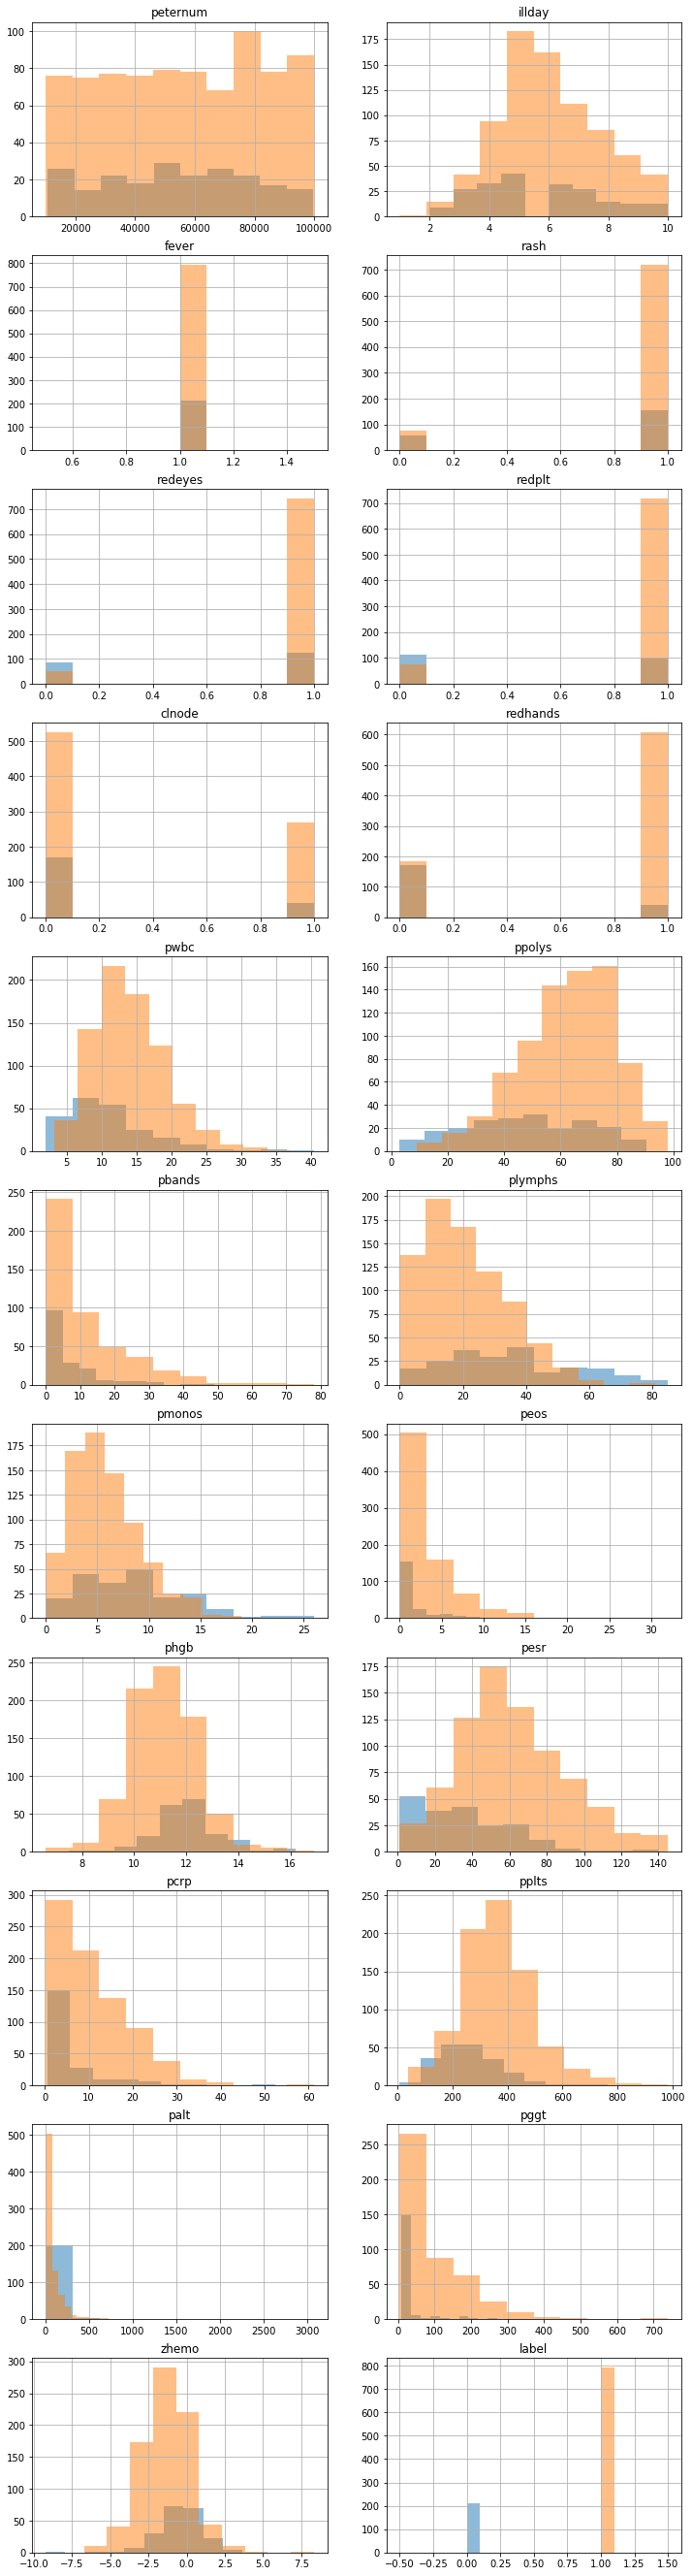

In [174]:
# Histograms for each numeric feature, grouped by label
    # Orange: KD
    # Blue: Febrile Control
    # (this took me way too long)
plt.clf()
fig, axes = plt.subplots(len(numeric_columns)//2, 2, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        feature = numeric_columns[i]
        axis.set_title(feature)
        df.groupby('label')[feature].hist(alpha=0.5, ax=axis)
        i = i+1
        
plt.show()

## 3. Feature Correlation

In [11]:
# Feature correlation matrix
df.corr()

,peternum,illday,fever,rash,redeyes,redplt,clnode,redhands,pwbc,ppolys,pbands,plymphs,pmonos,peos,phgb,pesr,pcrp,pplts,palt,pggt,zhemo,label
peternum,1.000000,0.033408,NaN,0.033690,-0.023056,-0.016624,-0.072434,0.025524,-0.006519,0.007804,0.039390,-0.020298,-0.022136,0.064541,-0.004160,-0.034924,0.006322,-0.037840,0.036946,0.008015,-0.002581,0.034860
illday,0.033408,1.000000,NaN,-0.123561,0.010362,0.052878,-0.000597,-0.064932,0.141936,0.061416,-0.188535,0.033999,0.018375,0.066382,-0.082744,0.201104,-0.036925,0.255723,-0.150256,-0.054004,-0.137512,0.094363
fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rash,0.033690,-0.123561,NaN,1.000000,-0.024676,0.060027,-0.057956,0.196712,-0.022453,-0.022006,0.150079,-0.019125,-0.149184,0.097361,0.010822,-0.104751,0.066919,-0.034239,0.068125,0.103175,0.031636,0.216850
redeyes,-0.023056,0.010362,NaN,-0.024676,1.000000,0.310729,0.047473,0.172847,0.050588,0.175870,0.092585,-0.214091,-0.093971,0.080029,-0.007673,0.130260,0.046938,0.114651,0.059720,0.128266,-0.014971,0.405919
redplt,-0.016624,0.052878,NaN,0.060027,0.310729,1.000000,0.028201,0.256990,0.090710,0.156403,0.110573,-0.200315,-0.081273,0.026148,-0.059828,0.155256,0.099015,0.115461,0.083760,0.146191,-0.052771,0.458414
clnode,-0.072434,-0.000597,NaN,-0.057956,0.047473,0.028201,1.000000,0.045787,0.064963,0.171937,0.012583,-0.179207,-0.075908,-0.053316,0.043831,0.156367,0.062906,0.019384,0.087931,0.017012,0.010634,0.126406
redhands,0.025524,-0.064932,NaN,0.196712,0.172847,0.256990,0.045787,1.000000,0.147568,0.187141,0.126200,-0.204721,-0.221248,0.069164,-0.121105,0.120687,0.141409,0.160617,0.082359,0.203235,-0.101498,0.487978
pwbc,-0.006519,0.141936,NaN,-0.022453,0.050588,0.090710,0.064963,0.147568,1.000000,0.276537,-0.019655,-0.238220,-0.228849,-0.080748,-0.206945,0.275103,0.275146,0.389125,-0.052996,0.122795,-0.168433,0.218037
ppolys,0.007804,0.061416,NaN,-0.022006,0.175870,0.156403,0.171937,0.187141,0.276537,1.000000,-0.331828,-0.788085,-0.370913,-0.024143,0.026449,0.239984,0.214331,0.106795,0.000837,0.118217,-0.078113,0.315651


## 4. Dimensionality Reduction & Visualization

In [55]:
# Get dataframe with trainable features only
drop_columns = ['peternum', 'signESR', 'signCRP', 'signALT', 'signGGT', 'label']
df_train = df.drop(drop_columns, axis=1) # drop non-training columns
df_train = df_train.fillna(df_train.mean()) # fill NaNs with feature mean
print(list(df_train)) # list remaining columns

feature_values = df_train.values
labels = df['label'].values

['illday', 'fever', 'rash', 'redeyes', 'redplt', 'clnode', 'redhands', 'pwbc', 'ppolys', 'pbands', 'plymphs', 'pmonos', 'peos', 'phgb', 'pesr', 'pcrp', 'pplts', 'palt', 'pggt', 'zhemo']


### PCA (Principal Component Analysis)

In [63]:
# Apply PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca.fit(feature_values)
pca_output = pca.transform(feature_values)
print("Explained variance ratios: ", pca.explained_variance_ratio_)

Explained variance ratios:  [ 0.46485802  0.40292761]


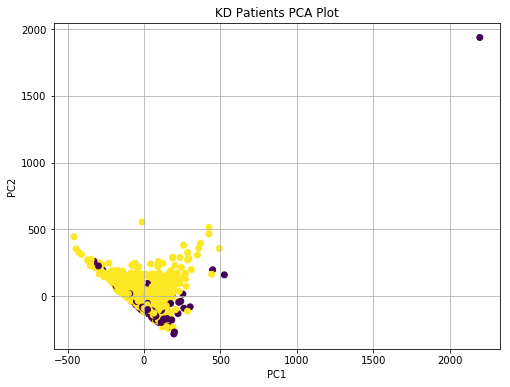

In [89]:
# Show PCA plot with labels (yellow = has KD)
plt.scatter(pca_output[:, 0], pca_output[:, 1], c=labels)
plt.title("KD Patients PCA Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
fig = plt.gcf()
fig.set_size_inches(8, 6)

plt.show()

# looks like there's a huge outlier...

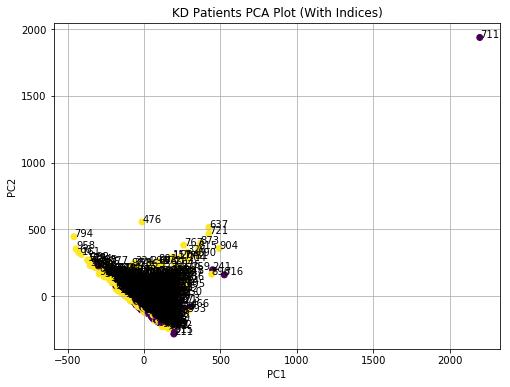

In [91]:
# Plot PCA with index labels (spot the outlier)
plt.scatter(pca_output[:, 0], pca_output[:, 1], c=labels)

# Add index labels
for i in range(pca_output.shape[0]):
    plt.text(pca_output[i,0], pca_output[i,1], str(i))

plt.title("KD Patients PCA Plot (With Indices)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
fig = plt.gcf()
fig.set_size_inches(8, 6)

plt.show()

# It's #711. TODO: look into patient #711

In [96]:
# Info for patient #711
# palt is ridiculously high
df.iloc[711]

peternum    74455
illday          3
fever           1
rash            1
redeyes         1
redplt          1
clnode          1
redhands        0
pwbc          3.2
ppolys         23
pbands         27
plymphs        44
pmonos          2
peos            4
phgb         12.7
signESR       NaN
pesr           19
signCRP       NaN
pcrp          1.2
pplts         174
signALT       NaN
palt         3080
signGGT       NaN
pggt          190
zhemo       -0.44
label           0
Name: 711, dtype: object

### LDA (Linear Discriminant Analysis)

In [78]:
# Apply LDA (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
lda.fit(feature_values, labels)
lda_output = lda.transform(feature_values)
print("Explained variance ratios: ", lda.explained_variance_ratio_)

Explained variance ratios:  [ 1.]


/Users/lucashu/anaconda/envs/kd/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


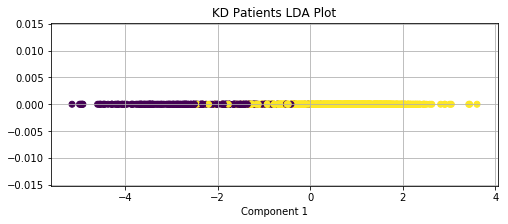

In [83]:
# Show LDA plot with labels (yellow = has KD)
plt.scatter(lda_output[:, 0], np.zeros(len(lda_output)), c=labels)
plt.title("KD Patients LDA Plot")
plt.xlabel("Component 1")
plt.grid()
fig = plt.gcf()
fig.set_size_inches(8, 3)
plt.show()